<center>
    <h1>The (almost) all-Python QEpy software</h1>
<center>
<br>
<table>
  <tr>
      <td><p><h1>Pavanello Research Group</h1></p><p><h2>Rutgers University-Newark</h2></p></td>
  </tr>
  <tr>
    <td></td>
  </tr>
</table>


# Acknowledgements

<table>
  <tr>
      <td><p><p>Michele Pavanello</p><p>Bhaskar Rana</p><p>Xuecheng Shao</p><p>Jessica Martinez</p><p>Valeria Rios </p></td>
  </tr>
</table>

#### Quantum MultiScale School July 17th 2025
Funding: NSF, DOE, MolSSI, ACS-PRF, Rutgers

<center>
  <h1 style="margin-bottom: 0;">The (Almost) All-Python <b>QEpy</b> Software</h1>
  <h3 style="margin-top: 0; font-weight: normal;">Pavanello Research Group, Rutgers University–Newark</h3>
</center>
<br>
<center>
Quantum MultiScale School July 17th 2025
</center>
<hr>

<h2 style="color: #444;">Acknowledgements</h2>
<table>
<ul style="font-size: 1.1em;">
  <li>Michele Pavanello</li>
  <li>Bhaskar Rana</li>
  <li>Xuecheng Shao</li>
  <li>Jessica Martinez</li>
  <li>Valeria Rios</li>
</ul>
</table>
<hr>

<!-- <p style="font-size: 1em;"><b>Quantum MultiScale School</b> – July 17, 2025</p> -->
<p style="font-size: 0.95em;">Funding: NSF, DOE, MolSSI, ACS-PRF, Rutgers</p>

# Acknowledgements

<table>
  <tr>
      <td><p><p>Michele Pavanello</p><p>Bhaskar Rana</p><p>Xuecheng Shao</p><p>Jessica Martinez</p><p>Valeria Rios </p></td>
  </tr>
</table>

Funding: NSF, DOE, MolSSI, ACS-PRF, Rutgers

<center>
QEpy driver: Python driver class for Quantum ESPRESSO - KS-DFT in Python

<br>
<br>

<center>
    <div class="alert alert-success"> GOALS:</div>
    <div class="alert alert-success">1) Get Density of state and band structure of Graphene</div>
</center>

#### Getting started!

- Go to QEPy/eos in your tunneled Jupyter-Notebook

<br>
<center>
<h6> ./QEPy/band/QEPY-RISE.ipynb</h6>
</center>

- Run this alongside with me! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qepy.calculator import QEpyCalculator
from qepy.io import QEInput

In [2]:
from ase.io.trajectory import Trajectory
from ase.lattice.hexagonal import Graphene
from ase import Atoms
from ase.io import read,write
import py3Dmol

## Build your system

In [3]:
atoms = Atoms(Graphene('C', latticeconstant={'a':2.46, 'c': 7}))
write('Graphene.xyz',atoms)
v = py3Dmol.view(data=open('./Graphene.xyz','r').read(), style='sphere')
v.addUnitCell()
v.zoomTo()
v.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Build an 'Input' file

In [4]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'prefix': "'tmp'",
        'pseudo_dir': "'./'"},
    '&system': {
        'ibrav' : 0,
        'ecutwfc': 20,
        'ecutrho': 200},
    '&electrons': {
        'conv_thr' : 1.0e-8},
     'atomic_species': ['C 12.0107 C.pbe-rrkjus.UPF'],
     'k_points automatic': [' 9 9 1 0 0 0'],
}

## Download the Pseupotentials

In [5]:
additional_files = ['https://pseudopotentials.quantum-espresso.org/upf_files/C.pbe-rrkjus.UPF']
from dftpy.formats import download_files
download_files(additional_files)

## Generate the calculator
##### Atom positions are update automatically by the calculator

In [12]:
calc = QEpyCalculator(qe_options=qe_options, logfile='tmp.out')
atoms.calc=calc

## Run a ground state calculation

In [13]:
energy = atoms.get_potential_energy()
efermi = calc.get_fermi_level() #Ry
print(efermi)

1.2286581026918515


## DOS with a fine K-points

In [14]:
qe_options['k_points automatic']= ['12 12 1 0 0 0']
energies, dos =  atoms.calc.get_dos(qe_options, width=0.4)

Text(0, 0.5, 'DOS')

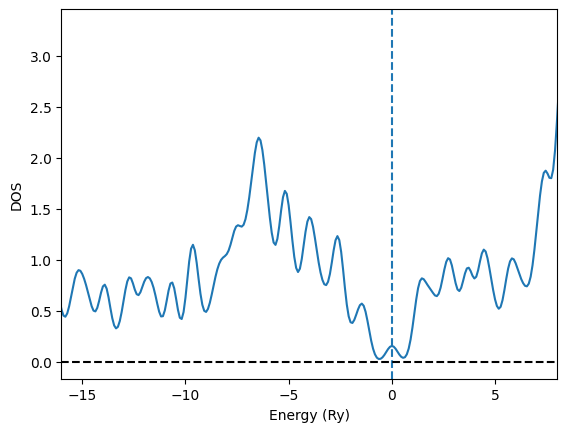

In [15]:
emin = -16.0
emax = 8.0
plt.plot(energies, dos)
plt.xlim(emin, emax)
plt.axvline(x=0, ls='--')
plt.axhline(y=0, ls='--', color='black')
plt.xlabel('Energy (Ry)')
plt.ylabel('DOS')

## Band structure with ASE bandpath

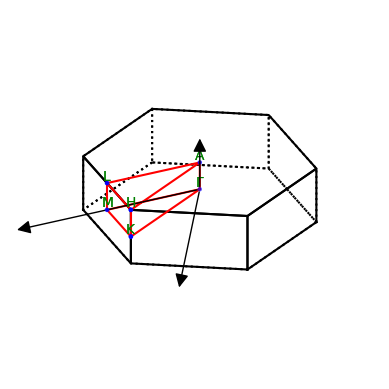

HEX(a=2.46, c=7)
  Variant name: HEX
  Special point names: GMKALH
  Default path: GMKGALHA,LM,KH

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    M   0.5000  0.0000  0.0000
    K   0.3333  0.3333  0.0000
    A   0.0000  0.0000  0.5000
    L   0.5000  0.0000  0.5000
    H   0.3333  0.3333  0.5000



In [16]:
lat = atoms.cell.get_bravais_lattice()
lat.plot_bz(show=True)
print(lat.description())

In [17]:
path = atoms.cell.bandpath('GKMG',npoints=61)

In [18]:
for kp in np.arange(atoms.calc.driver.get_number_of_k_points()):
    '''Irreducible k-points'''
    print(kp,atoms.calc.driver.get_occupation_numbers(kpt=kp))

0 [0.01388889 0.01388889 0.01388889 0.01388889 0.         0.
 0.         0.        ]
1 [0.08333333 0.08333333 0.08333333 0.08333333 0.         0.
 0.         0.        ]
2 [0.08333333 0.08333333 0.08333333 0.08333333 0.         0.
 0.         0.        ]
3 [0.08333333 0.08333333 0.08333333 0.08333333 0.         0.
 0.         0.        ]
4 [0.08333333 0.08333333 0.08333333 0.08333333 0.         0.
 0.         0.        ]
5 [0.08333333 0.08333333 0.08333333 0.08333333 0.         0.
 0.         0.        ]
6 [0.04166667 0.04166667 0.04166667 0.04166667 0.         0.
 0.         0.        ]
7 [0.08333333 0.08333333 0.08333333 0.08333333 0.         0.
 0.         0.        ]
8 [0.16666667 0.16666667 0.16666667 0.16666667 0.         0.
 0.         0.        ]
9 [0.16666667 0.16666667 0.16666667 0.16666667 0.         0.
 0.         0.        ]
10 [0.16666667 0.16666667 0.16666667 0.16666667 0.         0.
 0.         0.        ]
11 [0.16666667 0.16666667 0.16666667 0.16666667 0.         0.
 0

In [19]:
qe_options['&system']['nbnd']=6
band = atoms.calc.get_band_structure(qe_options, kpts=path, reference=efermi)

(-16.0, 8.0)

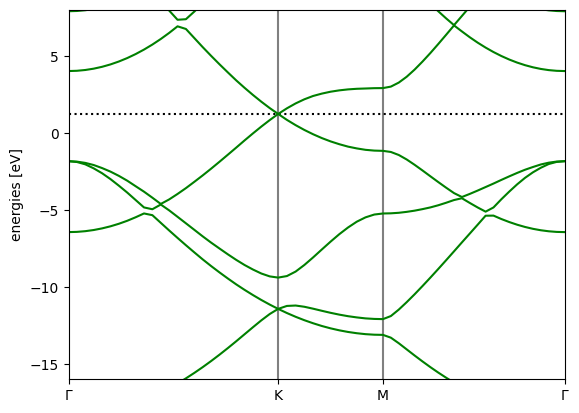

In [20]:
bp=band.plot()
bp.set_ylim(-16,8)

## Plotting both Band structure and DOS 

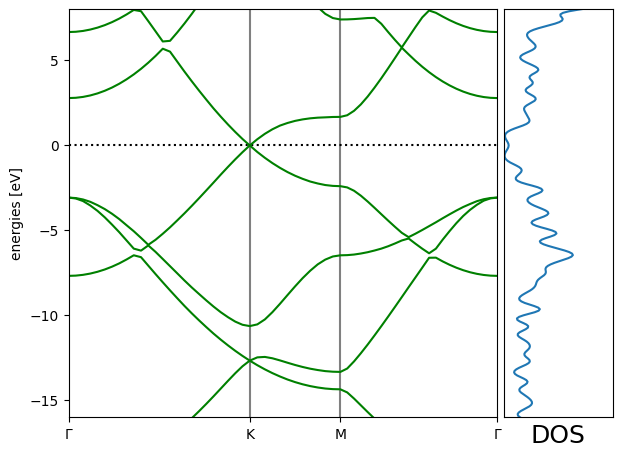

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([.12, .07, .67, .85])

emin = -16.0
emax = 8.0

bands = band.subtract_reference()
bands.plot(ax=ax, emin=emin, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.plot(dos, energies)

dosax.set_ylim(emin, emax)
dosax.set_xlim(0, None)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18);

# Challenge

1. Obtain the Band structure and DOS for Silicon (Diamond, cubic cell, a,b,c = 0.543 nm) or your own system with QEPy.